## Evaluate the BirdNET model with a test dataset - Rémi Ançay - 2025

This notebook allows you to evaluate the BirdNet original model on a test dataset of audio files.

It is based on the birdnet package, which is a Python wrapper for the BirdNET model.

You can configure the dataset path below, then run the cells to evaluate the model.

In [72]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from pathlib import Path
from birdnet import predict_species_within_audio_file
from birdnet.models.v2m4 import AudioModelV2M4Protobuf
from birdnet import SpeciesPredictions

In [ ]:
# Set the dataset folder path
dataset_folder = "augmented_dataset/"

In [ ]:
# Initialize the BirdNET model
birdnet_model = AudioModelV2M4Protobuf()

In [74]:
def get_predictions(audio_folder, model):
    result = []
    
    for species in os.listdir(audio_folder):
        file_paths = []
        species_folder = os.path.join(audio_folder, species)
        if os.path.isdir(species_folder):
            for file in os.listdir(species_folder):
                if file.endswith(".wav"):
                    file_path = Path(os.path.join(species_folder, file))
                    file_paths.append(file_path)
    
        print(f"Analyzing species {species}...")
        file_predictions = list()
        for file_path in file_paths:
            #print(f"Analyzing {file_path.name}...")
            pred_result = SpeciesPredictions(predict_species_within_audio_file(file_path, custom_model=model))
            #print(f"Prediction result: {pred_result}")
            file_predictions.append((file_path, pred_result))
        result.append((species, file_predictions))
    
    return result

In [ ]:
# Evaluate the BirdNET model on the dataset
predictions = get_predictions(dataset_folder, birdnet_model)

Analyzing species S1( Blue Jay)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 83.66s/s]


Analyzing species S10(Common Yellowthroat)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 80.95s/s]


Analyzing species S11(Chipping Sparrow)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 59.68s/s]


Analyzing species S12(American Yellow Warbler)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 82.00s/s]


Analyzing species S2(Song Sparrow)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 83.03s/s]


Analyzing species S3(Great Blue Heron)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 81.52s/s]


Analyzing species S4(American Crow)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 83.70s/s]


Analyzing species S5(Cedar Waxwing)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 79.38s/s]


Analyzing species S6(House Finch)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 83.95s/s]


Analyzing species S7(Indigo Bunting)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 84.47s/s]


Analyzing species S8(Unknown Events)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 82.89s/s]


Analyzing species S9(Marsh Wren)...


Predicting species: 100%|██████████| 6/6 [00:00<00:00, 82.34s/s]


In [76]:
# Get the best prediction for each clip
# exemple : preds = predictions[2][1][0][1]
def get_best_prediction_per_clip(preds):
    best_confidence = 0.0
    best_pred = None

    for time in preds.items():

        for item in time[1].items():
            conf = item[1]
            if conf > best_confidence:
                best_confidence = conf
                best_pred = item
        
    return best_pred


In [ ]:
# Prediction example
for clips in predictions[2][1]:
    print(clips[0])
    best_pred = get_best_prediction_per_clip(clips[1])
    print(f"Best prediction: {best_pred[0]} with confidence {best_pred[1]}")
    print("")


augmented_dataset\S11(Chipping Sparrow)\combined_1.wav
Best prediction: Spizella passerina_Chipping Sparrow with confidence 0.21269218623638153

augmented_dataset\S11(Chipping Sparrow)\combined_2.wav
Best prediction: Spizella passerina_Chipping Sparrow with confidence 0.6632202863693237

augmented_dataset\S11(Chipping Sparrow)\combined_3.wav
Best prediction: Spizella breweri_Brewer's Sparrow with confidence 0.4626806378364563

augmented_dataset\S11(Chipping Sparrow)\combined_4.wav
Best prediction: Spizella breweri_Brewer's Sparrow with confidence 0.21468432247638702

augmented_dataset\S11(Chipping Sparrow)\combined_5.wav
Best prediction: Sporathraupis cyanocephala_Blue-capped Tanager with confidence 0.3841989040374756



In [78]:
# Create a DataFrame to store the best predictions for each clip
def create_dataframe(predictions):
    data = defaultdict(list)
    for species, file_predictions in predictions:
        for file_path, preds in file_predictions:
            best_pred = get_best_prediction_per_clip(preds)
            if best_pred is not None:
                data['Species'].append(species)
                data['File'].append(file_path.name)
                data['Best Prediction'].append(best_pred[0])
                data['Confidence'].append(best_pred[1])
    
    df = pd.DataFrame(data)
    return df

In [79]:
predictions_df = create_dataframe(predictions)

predictions_df.head()

,Species,File,Best Prediction,Confidence
0,S1( Blue Jay),combined_1.wav,Cyanocitta cristata_Blue Jay,0.983917
1,S1( Blue Jay),combined_10.wav,Cyanocitta cristata_Blue Jay,0.935951
2,S1( Blue Jay),combined_11.wav,Cyanocitta cristata_Blue Jay,0.989725
3,S1( Blue Jay),combined_12.wav,Cyanocitta cristata_Blue Jay,0.982293
4,S1( Blue Jay),combined_13.wav,Cyanocitta cristata_Blue Jay,0.949854


In [80]:
# Create separate bar plot for each species representing the bests predictions
def barplot_best_predictions(df):
    species_list = df['Species'].unique()
    
    for species in species_list:
        species_df = df[df['Species'] == species]
        plt.figure(figsize=(10, 6))
        sns.barplot(data=species_df, x='File', y='Confidence', hue='Best Prediction')
        plt.title(f'Best Predictions for {species}, n={len(species_df)} clips')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [81]:
# Create separate count plot for each species representing the bests predictions add color
def countplot_best_predictions(df):
    species_list = df['Species'].unique()
    
    for species in species_list:
        species_df = df[df['Species'] == species]
        plt.figure(figsize=(10, 6))
        sns.countplot(data=species_df, x='Best Prediction', palette="Set1")
        plt.title(f'Best Predictions for {species}, n={len(species_df)} clips')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [82]:
# Create separate pie plot for each species representing the bests predictions
def pieplot_best_predictions(df):
    species_list = df['Species'].unique()
    
    for species in species_list:
        species_df = df[df['Species'] == species]
        counts = species_df['Best Prediction'].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of Best Predictions for {species}, n={len(species_df)}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()


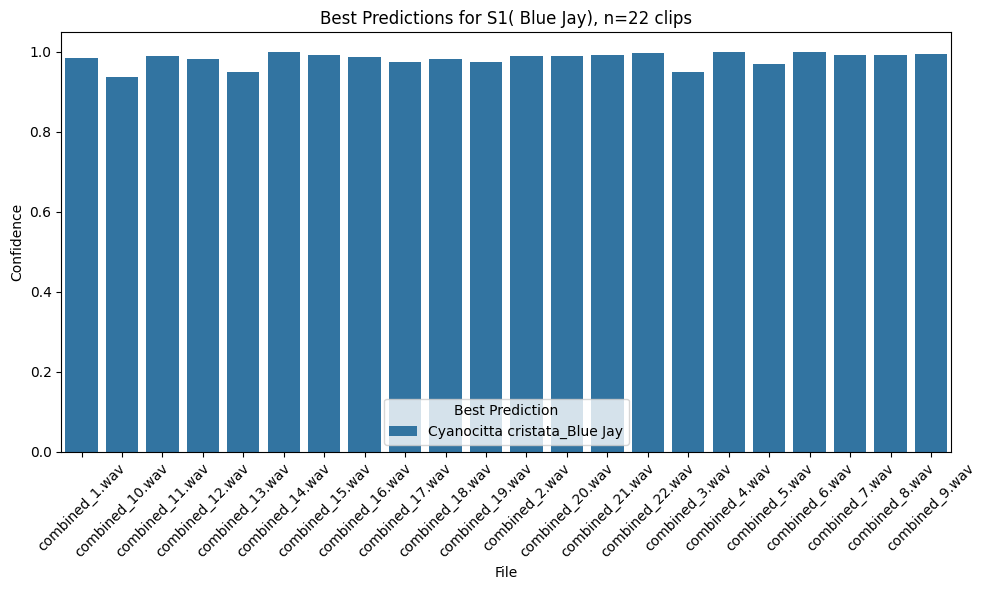

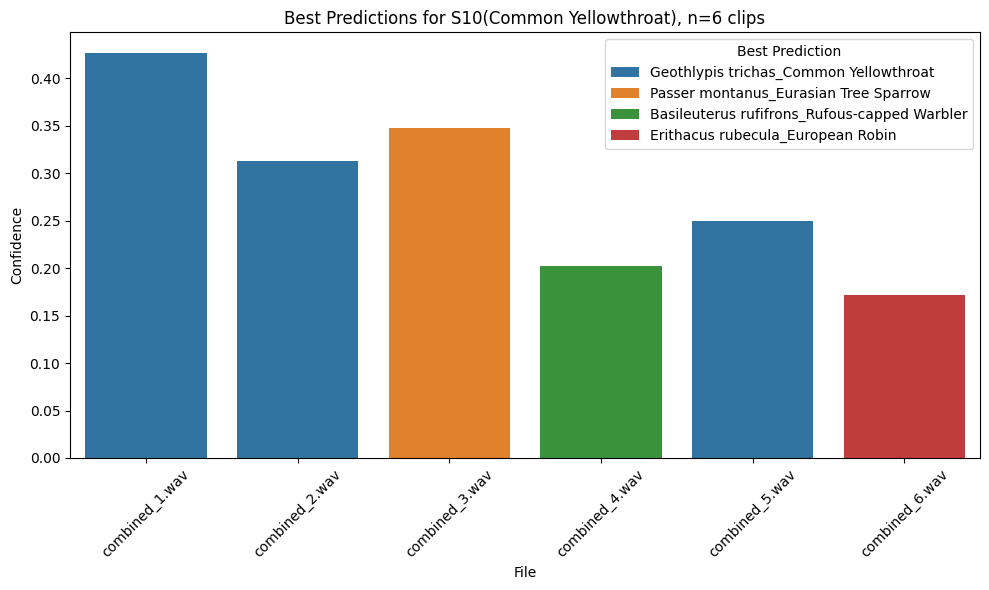

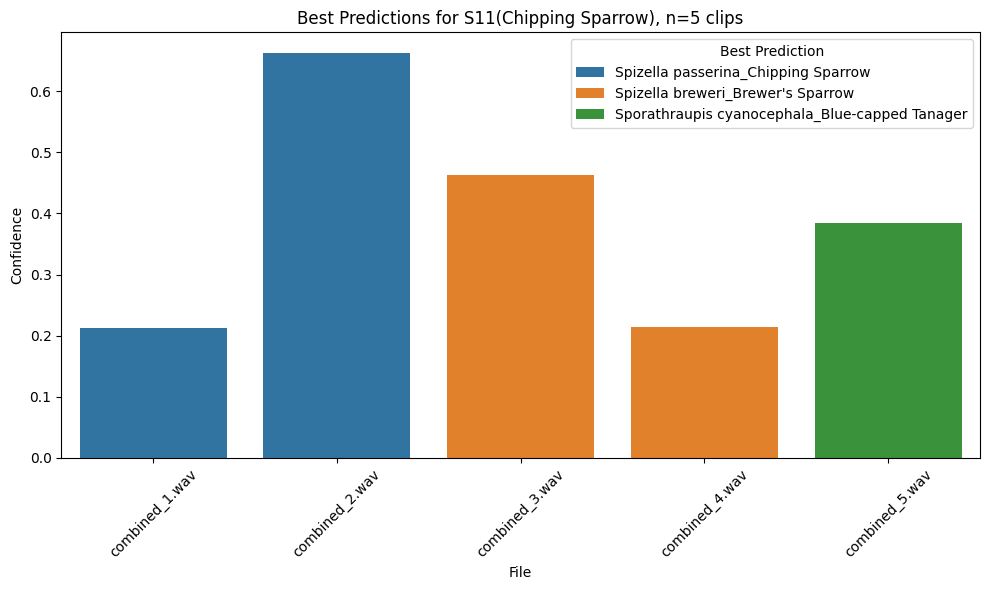

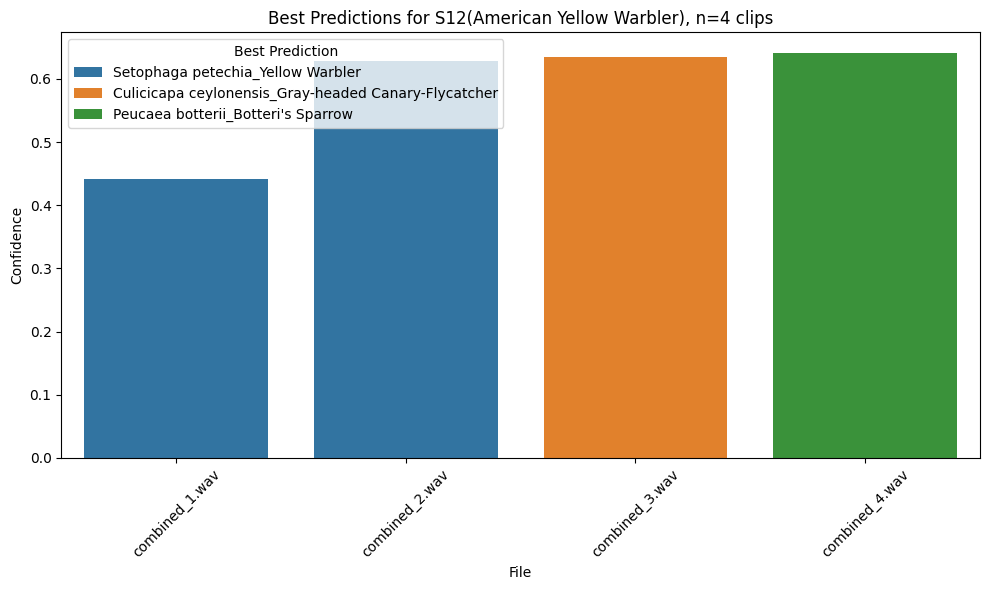

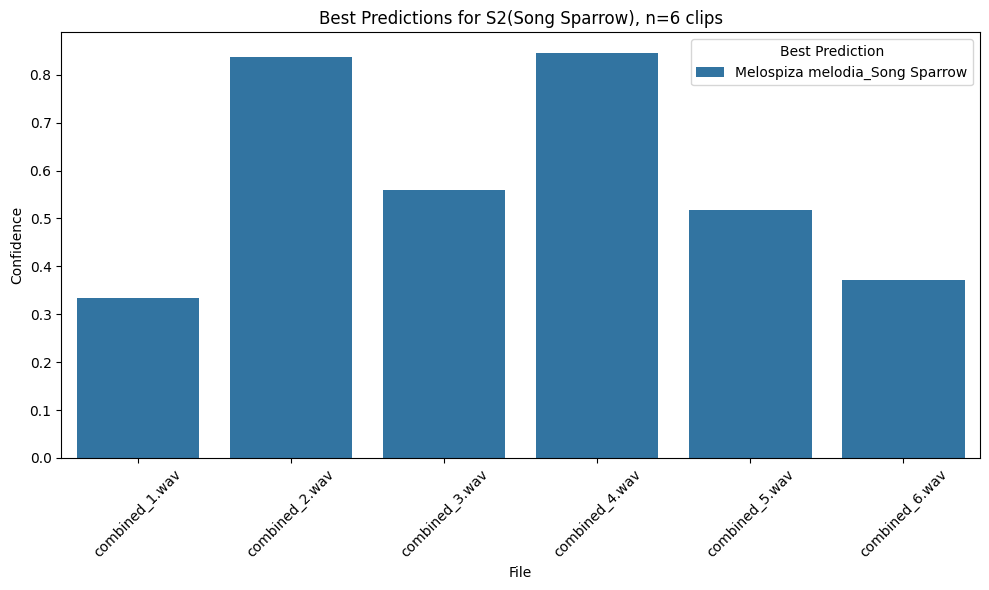

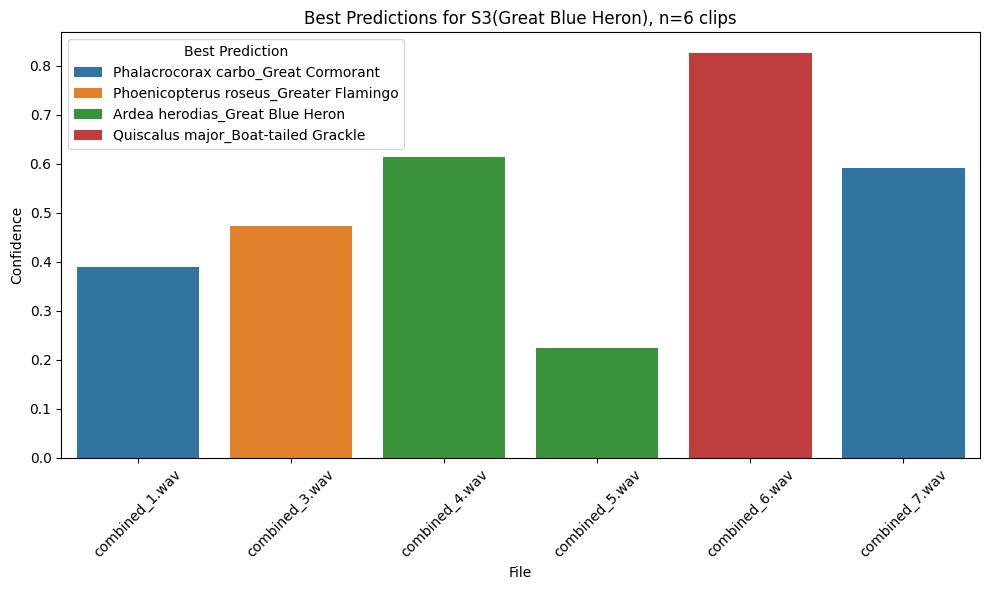

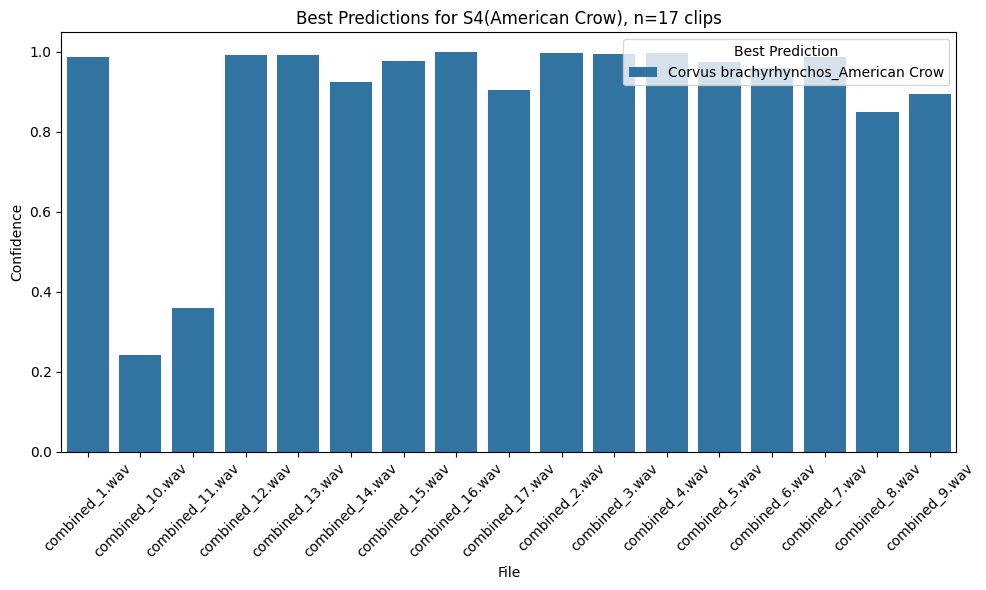

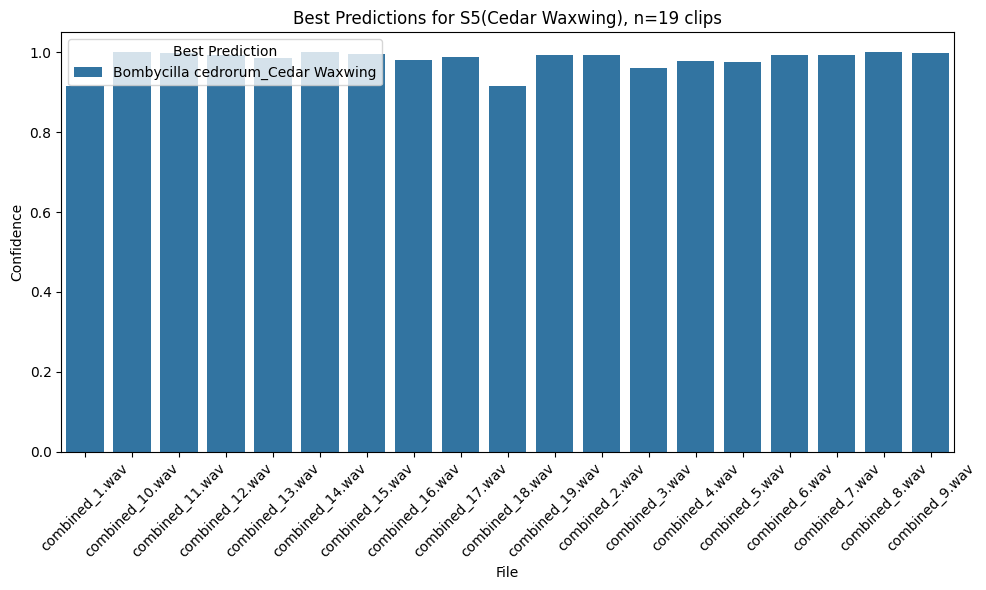

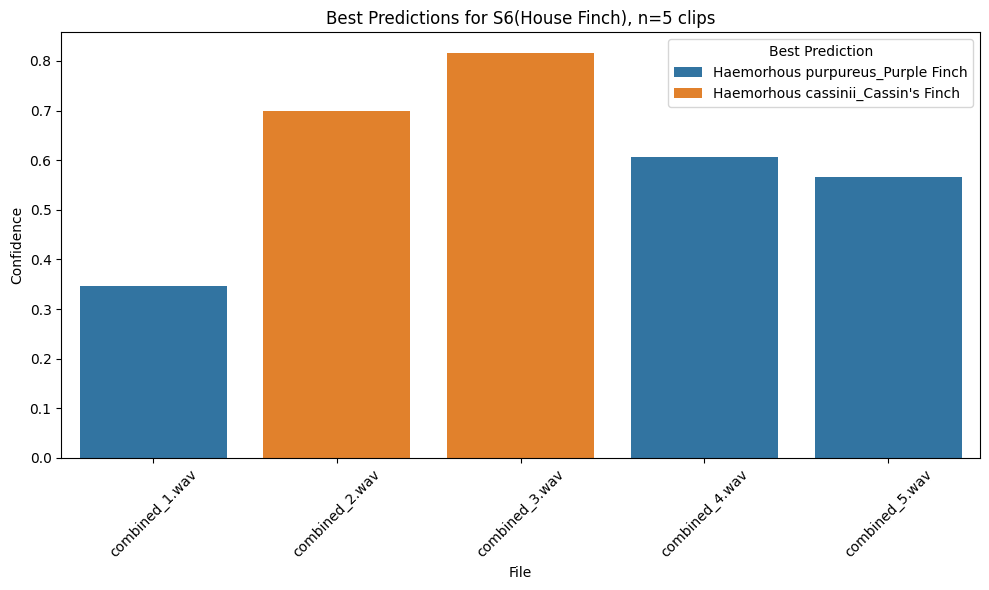

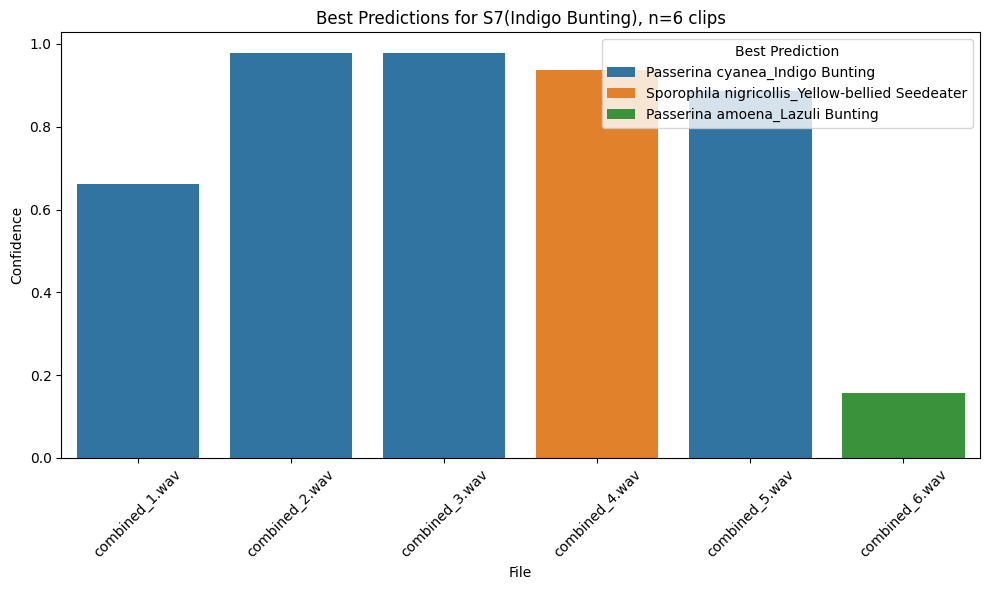

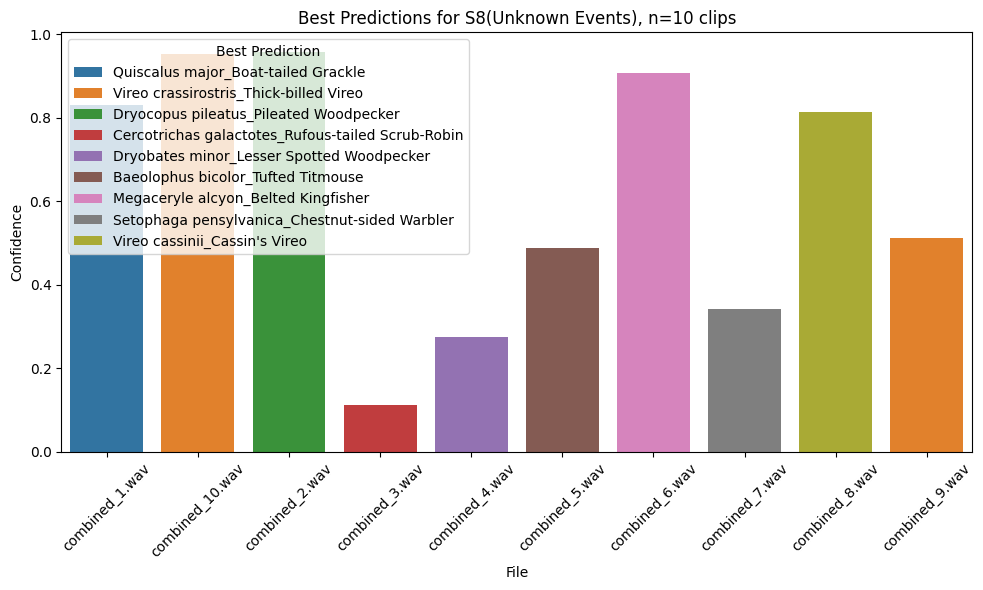

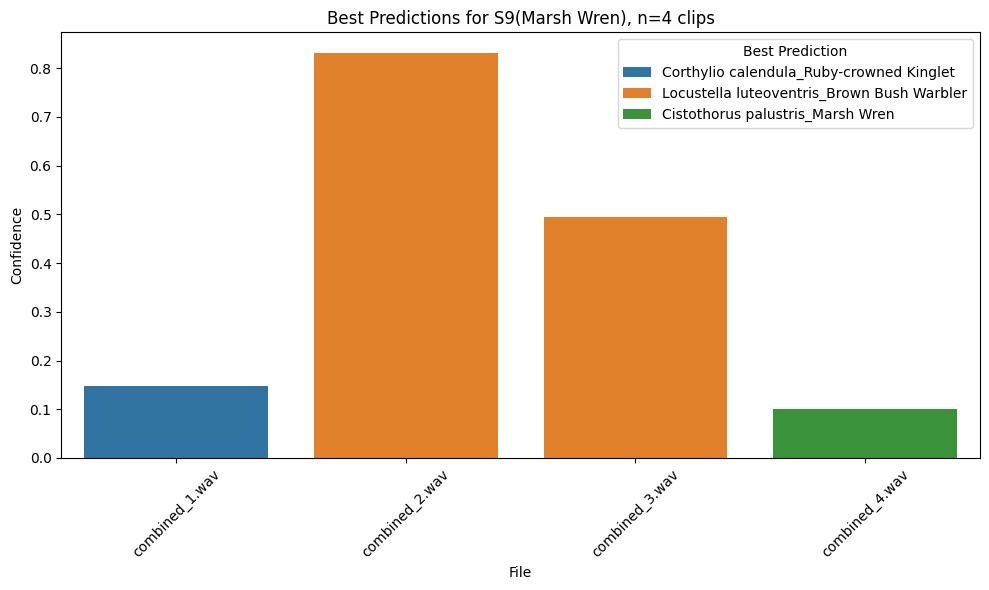

In [83]:
#barplot_best_predictions
#countplot_best_predictions
#pieplot_best_predictions
barplot_best_predictions(predictions_df)